### Dependências e Configurações

In [ ]:
!pip install basedosdados

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

### Gerando amostra para análise exploratória

In [ ]:
'''
Importa base de dados para dataframe

import basedosdados as bd

query = """
SELECT *
FROM `basedosdados.br_ms_sinasc.microdados`
WHERE extract(year from data_nascimento) > 2014
ORDER BY rand()
LIMIT 100000
"""

dicionario = bd.read_table(dataset_id='br_ms_sinasc', table_id='dicionario', billing_project_id="introducao-a-ciencia-dos-dados")
df = bd.read_sql(query, billing_project_id="introducao-a-ciencia-dos-dados")
'''

'\nImporta base de dados para dataframe\n\nimport basedosdados as bd\n\nquery = """\nSELECT *\nFROM `basedosdados.br_ms_sinasc.microdados` \nWHERE extract(year from data_nascimento) > 2014\nORDER BY rand()\nLIMIT 100000\n"""\n\ndicionario = bd.read_table(dataset_id=\'br_ms_sinasc\', table_id=\'dicionario\', billing_project_id="introducao-a-ciencia-dos-dados")\ndf = bd.read_sql(query, billing_project_id="introducao-a-ciencia-dos-dados")\n'

In [ ]:
'''
Salva em arquivo csv para uso posterior

dicionario.to_csv('dicionario.csv')
df.to_csv('microdados.csv')
'''

"\nSalva em arquivo csv para uso posterior\n\ndicionario.to_csv('dicionario.csv')\ndf.to_csv('microdados.csv')\n"

### Configurando Matplotlib

In [ ]:
plt.rcParams['figure.figsize'] = (16, 10)
plt.rcParams['axes.axisbelow'] = True
plt.rcParams['axes.grid'] = True
plt.rcParams['axes.labelsize'] = 16
plt.rcParams['axes.linewidth'] = 2
plt.rcParams['axes.spines.bottom'] = True
plt.rcParams['axes.spines.left'] = True
plt.rcParams['axes.titlesize'] = 16
plt.rcParams['axes.ymargin'] = 0.1
plt.rcParams['font.family'] = 'serif'
plt.rcParams['grid.color'] = 'lightgrey'
plt.rcParams['grid.linewidth'] = .1
plt.rcParams['xtick.bottom'] = True
plt.rcParams['xtick.direction'] = 'out'
plt.rcParams['xtick.labelsize'] = 16
plt.rcParams['xtick.major.size'] = 12
plt.rcParams['xtick.major.width'] = 1
plt.rcParams['xtick.minor.size'] = 6
plt.rcParams['xtick.minor.width'] = 1
plt.rcParams['xtick.minor.visible'] = True
plt.rcParams['ytick.direction'] = 'out'
plt.rcParams['ytick.labelsize'] = 16
plt.rcParams['ytick.left'] = True
plt.rcParams['ytick.major.size'] = 12
plt.rcParams['ytick.major.width'] = 1
plt.rcParams['ytick.minor.size'] = 6
plt.rcParams['ytick.minor.width'] = 1
plt.rcParams['ytick.minor.visible'] = True
plt.rcParams['legend.fontsize'] = 16
plt.rcParams['lines.linewidth'] = 4
plt.rcParams['lines.markersize'] = 80
plt.style.use('tableau-colorblind10')
plt.ion();

# Etapa 1: Análise Exploratória

## Entendendo o contexto

- Visão geral do conjunto de dados, entendendo sua fonte, propósito e objetivo.
- Listar as principais perguntas que desejamos responder e os problemas que desejamos abordar com a análise.


Utilizaremos neste projeto a base de [Nascidos Vivos (SINASC)](https://basedosdados.org/dataset/br-ms-sinasc?bdm_table=microdados).

Os dados disponíveis são oriundos do Sistema de Informações sobre Nascidos Vivos (SINASC), sistema este gerido pelo Departamento de Análise de Situação de Saúde, da Secretaria de Vigilância em Saúde, em conjunto com as Secretarias Estaduais e Municipais de Saúde.

Ela cobre um período de tempo desde o ano de 1994 até 2020, mas nesse estudo focaremos apenas em dados posteriores à 2015.

In [ ]:
dicionario = pd.read_csv('https://raw.githubusercontent.com/beromes/projeto-icd/main/datasets/dicionario.csv')
df = pd.read_csv('https://raw.githubusercontent.com/beromes/projeto-icd/main/datasets/microdados.csv')

<ipython-input-32-92dc4e99299b>:2: DtypeWarning: Columns (28) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('https://raw.githubusercontent.com/beromes/projeto-icd/main/datasets/microdados.csv')


## Familiarização com os dados

  - Remover atributos que não sejam de interesse
  - Explorar a estrutura do conjunto de dados, verificando o número de variáveis (colunas) e observações (linhas).
  - Identificar os tipos de dados presentes em cada variável (numérico, categórico, texto, etc.).
  - Verificar a presença de valores ausentes

In [ ]:
df.head()

,Unnamed: 0,ano,sigla_uf,sequencial_nascimento,id_municipio_nascimento,local_nascimento,codigo_estabelecimento,data_nascimento,hora_nascimento,sexo,...,data_recebimento,data_recebimento_original,diferenca_data,data_declaracao,funcao_responsavel,documento_responsavel,formacao_profissional_responsavel,status_dn,status_dn_nova,paridade
0,0,2015,PA,53323,1501402,1,5332427.0,2015-04-15,06:14:00,1,...,2015-04-23,NaN,8,2015-04-15,5.0,4.0,1.0,0.0,1,1
1,1,2018,BA,510909,2913903,1,2603055.0,2018-03-17,16:10:00,2,...,2018-03-27,NaN,10,2018-03-17,2.0,3.0,1.0,0.0,1,0
2,2,2019,MA,1671425,2109601,1,2529769.0,2019-12-16,15:55:00,1,...,2020-01-28,NaN,43,2019-12-18,2.0,3.0,1.0,0.0,1,0
3,3,2015,SP,564596,3549805,1,2097117.0,2015-12-24,22:55:00,2,...,2016-01-13,NaN,20,2015-12-25,5.0,4.0,1.0,0.0,1,1
4,4,2019,RJ,2226826,3305802,1,2297795.0,2019-10-16,11:41:00,1,...,2020-11-24,NaN,405,2019-10-16,2.0,3.0,1.0,0.0,1,1


In [ ]:
dicionario

,Unnamed: 0,id_tabela,coluna,chave,cobertura_temporal,valor
0,0,microdados,local_nascimento,1,(1),Hospital
1,1,microdados,local_nascimento,2,(1),Outros estabelecimentos de saúde
2,2,microdados,local_nascimento,3,(1),Domicílio
3,3,microdados,local_nascimento,4,(1),Outros
4,4,microdados,local_nascimento,9,(1),Ignorado
...,...,...,...,...,...,...
412,412,microdados,formacao_profissional_responsavel,9,2013(1),Ignorado
413,413,microdados,status_dn,0,2010(1),Não
414,414,microdados,status_dn,1,2010(1),Sim
415,415,microdados,status_dn_nova,0,2010(1),Não


In [ ]:
df.describe()

,Unnamed: 0,ano,sequencial_nascimento,id_municipio_nascimento,local_nascimento,codigo_estabelecimento,sexo,peso,raca_cor,apgar1,...,data_registro_cartorio,origem,numero_lote,diferenca_data,funcao_responsavel,documento_responsavel,formacao_profissional_responsavel,status_dn,status_dn_nova,paridade
count,100000.000000,100000.000000,1.000000e+05,1.000000e+05,100000.000000,9.910200e+04,100000.000000,99964.000000,96484.000000,98002.000000,...,0.0,100000.000000,9.987500e+04,100000.000000,95511.000000,99359.000000,99242.000000,99987.0,100000.000000,100000.000000
mean,49999.500000,2017.445870,7.578884e+05,3.195615e+06,1.028100,2.828439e+06,1.484600,3187.261614,2.811958,8.444634,...,NaN,1.000430,2.017613e+07,68.210640,3.236653,3.114655,1.126388,0.0,0.999610,0.612560
std,28867.657797,1.698399,8.733986e+05,9.883340e+05,0.251537,1.677743e+06,0.500165,562.889644,1.437068,3.021263,...,NaN,0.025881,1.723745e+04,124.258368,1.546054,1.259293,0.459170,0.0,0.019745,0.487168
min,0.000000,2015.000000,1.000000e+00,1.100015e+06,1.000000,0.000000e+00,0.000000,190.000000,1.000000,0.000000,...,NaN,1.000000,2.015000e+07,0.000000,1.000000,0.000000,1.000000,0.0,0.000000,0.000000
25%,24999.750000,2016.000000,6.474725e+04,2.604106e+06,1.000000,2.121808e+06,1.000000,2904.000000,1.000000,8.000000,...,NaN,1.000000,2.016003e+07,13.000000,2.000000,3.000000,1.000000,0.0,1.000000,0.000000
50%,49999.500000,2017.000000,2.831855e+05,3.300704e+06,1.000000,2.452383e+06,1.000000,3220.000000,4.000000,9.000000,...,NaN,1.000000,2.018000e+07,24.000000,2.000000,3.000000,1.000000,0.0,1.000000,1.000000
75%,74999.250000,2019.000000,1.390614e+06,3.550308e+06,1.000000,2.775999e+06,2.000000,3530.000000,4.000000,9.000000,...,NaN,1.000000,2.019002e+07,48.250000,5.000000,4.000000,1.000000,0.0,1.000000,1.000000
max,99999.000000,2020.000000,2.944729e+06,5.300108e+06,9.000000,9.923837e+06,2.000000,6250.000000,5.000000,99.000000,...,NaN,3.000000,2.022002e+07,816.000000,5.000000,5.000000,9.000000,0.0,1.000000,1.000000


## Limpeza e pré-processamento dos dados

  - Remover dados considerados desnecessários para o estudo.
  - Remover dados duplicados, caso existam.
  - Tratar os valores ausentes de acordo com a estratégia definida (ex: preenchimento com a média, exclusão de linhas ou colunas, etc.).
  - Verificar e tratar possíveis outliers ou dados inconsistentes.

In [ ]:
df = df.drop(columns=[
  'Unnamed: 0',
  'apgar1',
  'apgar5',
  'cartorio',
  'classificacao_pre_natal',
  'codigo_anomalia',
  'codigo_estabelecimento',
  'data_recebimento',
  'data_recebimento_original',
  'data_registro_cartorio',
  'data_ultima_menstruacao',
  'diferenca_data',
  'documento_responsavel',
  'escolaridade_2010_agr_mae',
  'escolaridade_2010_mae',
  'formacao_profissional_responsavel',
  'funcao_responsavel',
  'gestacoes_ant',
  'id_anomalia',
  'id_municipio_nascimento',
  'local_nascimento',
  'numero_lote',
  'origem',
  'registro_cartorio',
  'sequencial_nascimento',
  'status_dn',
  'status_dn_nova',
  'tipo_apresentacao',
  'tipo_robson',
  'versao_sistema',
  'paridade'])
df.head()

,ano,sigla_uf,data_nascimento,hora_nascimento,sexo,peso,raca_cor,semana_gestacao,semana_gestacao_estimada,gestacao_agr,...,estado_civil_mae,ocupacao_mae,raca_cor_mae,quantidade_parto_normal,quantidade_parto_cesareo,inducao_parto,cesarea_antes_parto,idade_pai,data_cadastro,data_declaracao
0,2015,PA,2015-04-15,06:14:00,1,3255.0,4.0,38.0,2.0,5.0,...,1.0,521110.0,4.0,1.0,0.0,2.0,1.0,18.0,2015-04-22,2015-04-15
1,2018,BA,2018-03-17,16:10:00,2,2875.0,NaN,40.0,8.0,5.0,...,2.0,999992.0,NaN,0.0,0.0,2.0,3.0,NaN,2018-03-26,2018-03-17
2,2019,MA,2019-12-16,15:55:00,1,3610.0,4.0,NaN,NaN,NaN,...,5.0,999991.0,4.0,NaN,NaN,2.0,9.0,NaN,2020-01-27,2019-12-18
3,2015,SP,2015-12-24,22:55:00,2,2950.0,1.0,36.0,2.0,4.0,...,2.0,NaN,1.0,0.0,1.0,2.0,1.0,37.0,2016-01-12,2015-12-25
4,2019,RJ,2019-10-16,11:41:00,1,2570.0,1.0,38.0,8.0,5.0,...,5.0,999992.0,1.0,1.0,NaN,2.0,3.0,27.0,2020-01-14,2019-10-16


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 36 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ano                       100000 non-null  int64  
 1   sigla_uf                  100000 non-null  object 
 2   data_nascimento           100000 non-null  object 
 3   hora_nascimento           99856 non-null   object 
 4   sexo                      100000 non-null  int64  
 5   peso                      99964 non-null   float64
 6   raca_cor                  96484 non-null   float64
 7   semana_gestacao           98171 non-null   float64
 8   semana_gestacao_estimada  98171 non-null   float64
 9   gestacao_agr              98236 non-null   float64
 10  tipo_gravidez             99884 non-null   float64
 11  tipo_parto                99923 non-null   float64
 12  inicio_pre_natal          97046 non-null   float64
 13  pre_natal                 98025 non-null   fl

 ## Exploração com uma variável

  - Analisar variáveis mais relevantes individualmente.
  - Calcular medidas de tendência central (média, mediana, moda) e medidas de dispersão (desvio padrão, intervalo interquartil).
  - Criar visualizações adequadas para cada tipo de variável (histogramas, gráficos de barras, box plots, etc.) e interpretar os resultados.



In [ ]:
df.describe()

,ano,sexo,peso,raca_cor,semana_gestacao,semana_gestacao_estimada,gestacao_agr,tipo_gravidez,tipo_parto,inicio_pre_natal,...,escolaridade_mae,serie_escolar_mae,estado_civil_mae,ocupacao_mae,raca_cor_mae,quantidade_parto_normal,quantidade_parto_cesareo,inducao_parto,cesarea_antes_parto,idade_pai
count,100000.000000,100000.000000,99964.000000,96484.000000,98171.000000,98171.000000,98236.000000,99884.000000,99923.000000,97046.000000,...,99276.000000,62321.000000,99316.000000,75202.000000,95911.000000,94750.000000,94251.000000,98206.000000,90584.000000,39974.000000
mean,2017.445870,1.484600,3187.261614,2.811958,38.473999,5.597295,4.892941,1.021925,1.561192,5.126703,...,4.020247,4.019496,2.249386,729626.570557,2.808687,0.695662,0.376813,2.007922,2.324881,31.311728
std,1.698399,0.500165,562.889644,1.437068,2.223836,3.258031,0.458032,0.158269,0.497935,15.659081,...,0.795222,2.268255,1.587341,300025.437208,1.437506,1.390370,0.909254,1.145723,1.482419,7.706660
min,2015.000000,0.000000,190.000000,1.000000,19.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,10205.000000,1.000000,0.000000,0.000000,1.000000,1.000000,13.000000
25%,2016.000000,1.000000,2904.000000,1.000000,38.000000,2.000000,5.000000,1.000000,1.000000,2.000000,...,4.000000,3.000000,1.000000,512105.000000,1.000000,0.000000,0.000000,2.000000,1.000000,26.000000
50%,2017.000000,1.000000,3220.000000,4.000000,39.000000,8.000000,5.000000,1.000000,2.000000,2.000000,...,4.000000,3.000000,2.000000,999991.000000,4.000000,0.000000,0.000000,2.000000,2.000000,31.000000
75%,2019.000000,2.000000,3530.000000,4.000000,40.000000,8.000000,5.000000,1.000000,2.000000,3.000000,...,4.000000,6.000000,2.000000,999992.000000,4.000000,1.000000,1.000000,2.000000,3.000000,36.000000
max,2020.000000,2.000000,6250.000000,5.000000,45.000000,9.000000,9.000000,9.000000,9.000000,99.000000,...,9.000000,8.000000,9.000000,999994.000000,5.000000,99.000000,99.000000,9.000000,9.000000,99.000000


#### Ano

In [ ]:
serie = df[['ano', 'sigla_uf']].groupby('ano').count()
nova_serie = serie.copy()
['1-1-{}'.format(str(x)) for x in nova_serie.index][0]

'1-1-2015'

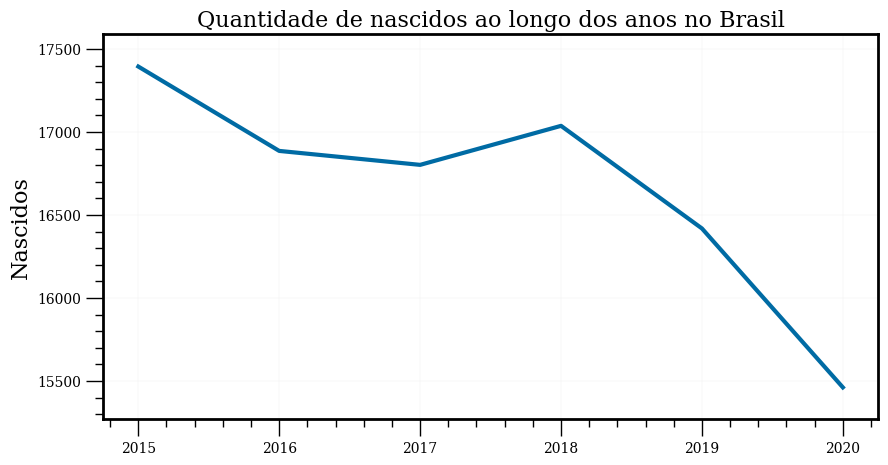

In [ ]:
nova_serie.plot(figsize=(10, 5), fontsize=10, lw=3)
plt.legend(show=False)
plt.xlabel('');

#### Estados e Regiões

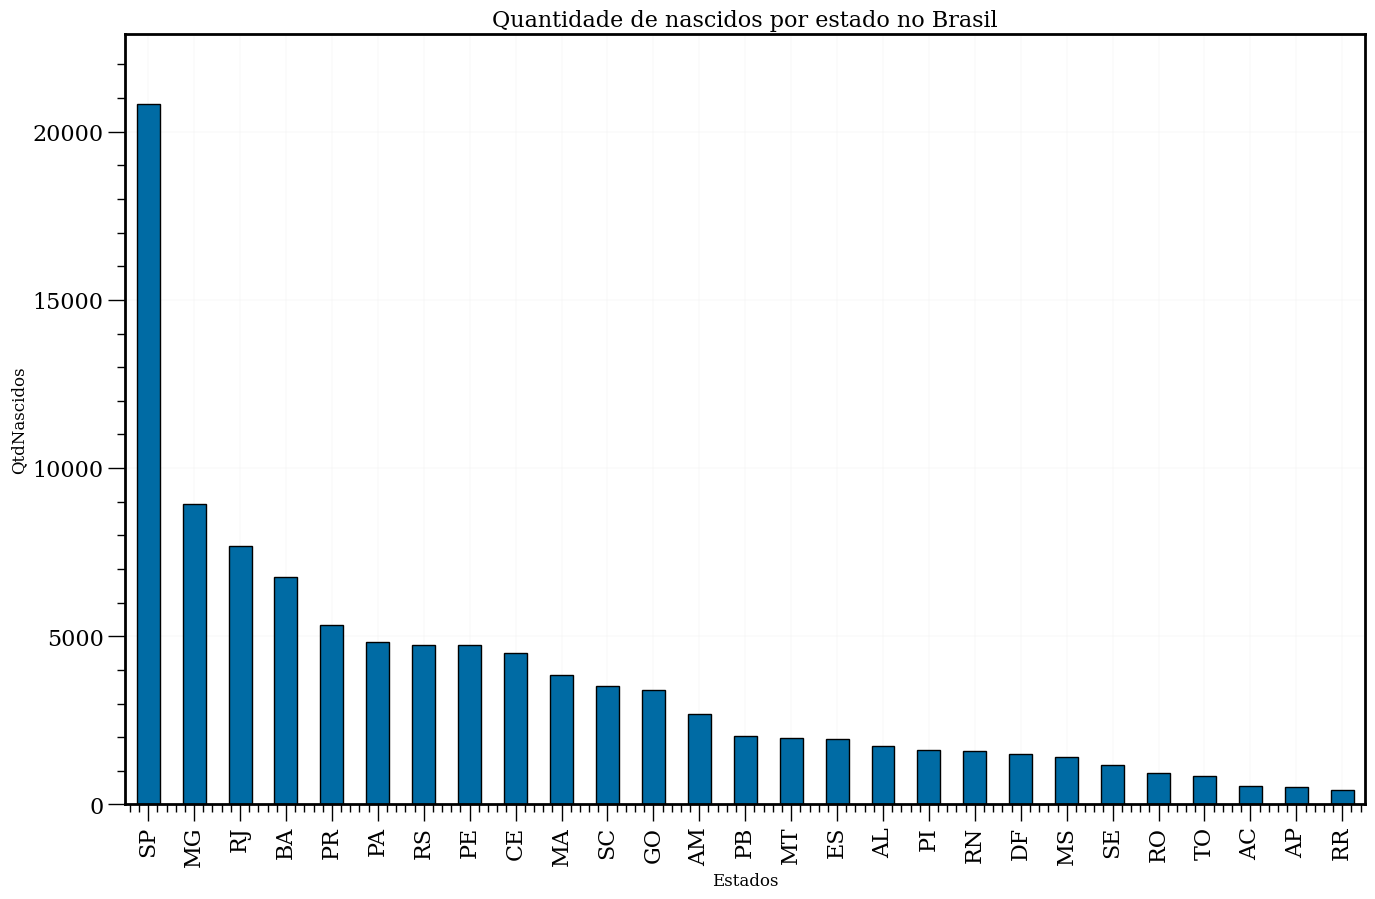

In [ ]:
uf = df.groupby('sigla_uf').count()['ano']
uf.sort_values()[::-1].plot.bar(edgecolor='k');


In [ ]:
ufToRegion = {
    'SP': 'Sudeste',
    'RJ': 'Sudeste',
    'MG': 'Sudeste',
    'ES': 'Sudeste',
    'RS': 'Sul',
    'SC': 'Sul',
    'PR': 'Sul',
    'MS': 'Centro-Oeste',
    'MT': 'Centro-Oeste',
    'GO': 'Centro-Oeste',
    'DF': 'Centro-Oeste',
    'TO': 'Norte',
    'AC': 'Norte',
    'RO': 'Norte',
    'AM': 'Norte',
    'PA': 'Norte',
    'RR': 'Norte',
    'AP': 'Norte',
    'BA': 'Nordeste',
    'SE': 'Nordeste',
    'AL': 'Nordeste',
    'PE': 'Nordeste',
    'PB': 'Nordeste',
    'PI': 'Nordeste',
    'MA': 'Nordeste',
    'CE': 'Nordeste',
    'RN': 'Nordeste',
}

df['region'] = df['sigla_uf'].map(ufToRegion)
df[['region','sigla_uf']]


,region,sigla_uf
0,Norte,PA
1,Nordeste,BA
2,Nordeste,MA
3,Sudeste,SP
4,Sudeste,RJ
...,...,...
99995,Norte,AM
99996,Nordeste,PI
99997,Sudeste,SP
99998,Sudeste,RJ


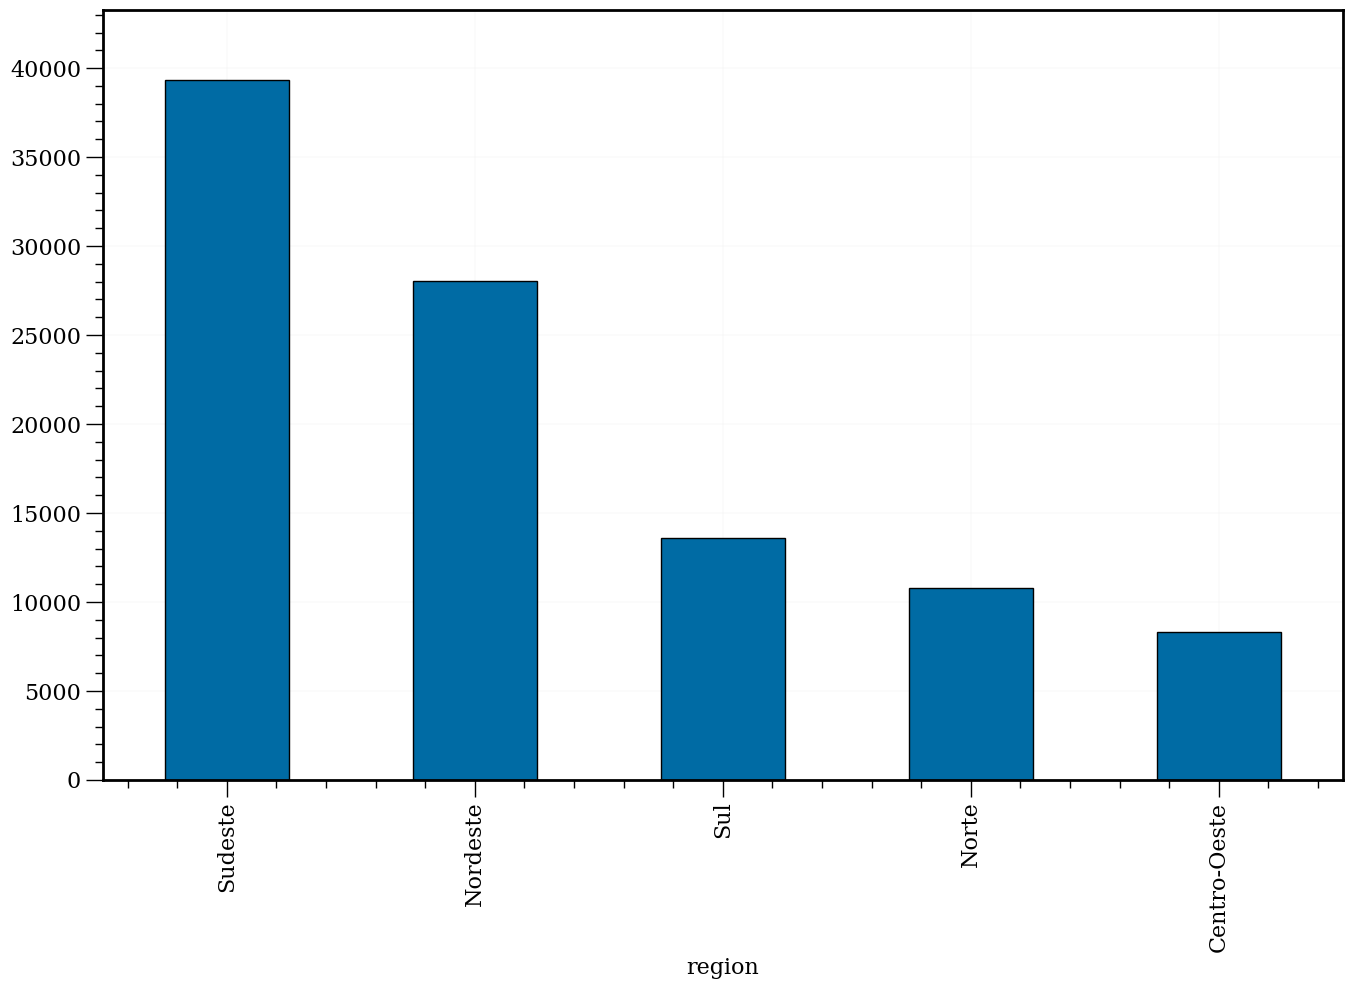

In [ ]:
regions = df.groupby('region').count()['ano']
regions.sort_values()[::-1].plot.bar(edgecolor='k');

### Idade dos pais

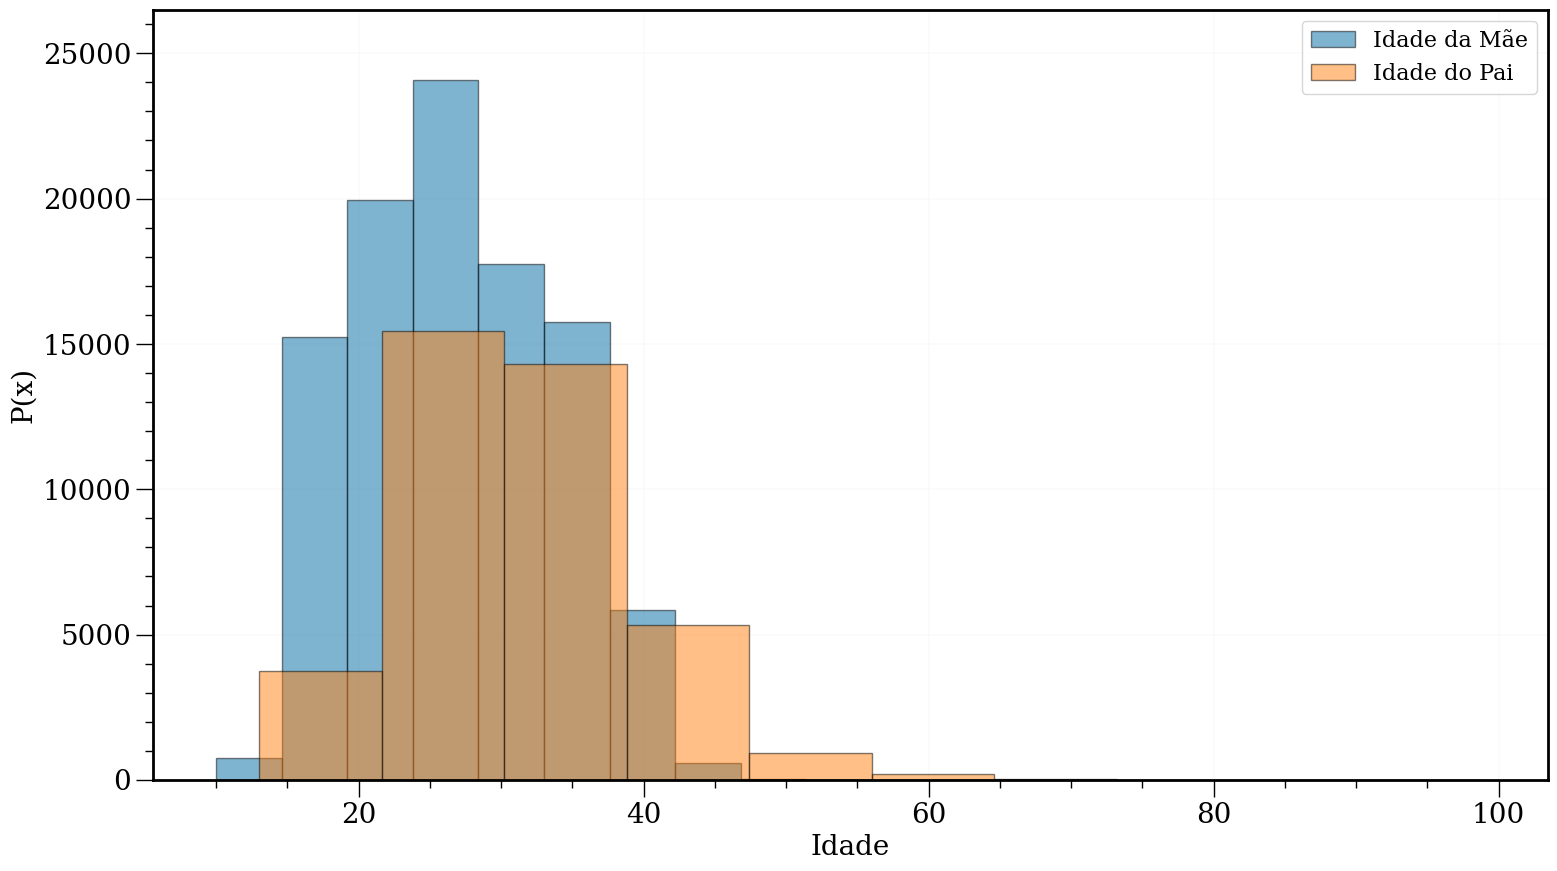

In [ ]:
plt.figure(figsize=(18, 10))
data1 = df['idade_mae']
data2 = df['idade_pai']
plt.xlabel('Idade')
plt.ylabel('P(x)')
plt.hist(data1, edgecolor='k', alpha=0.5, label='Idade da Mãe')
plt.hist(data2, edgecolor='k', alpha=0.5, label='Idade do Pai')
plt.legend()
ax = plt.gca()
for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] +
             ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(20)

## Exploração com duas variáveis

  - Identificar relações entre pares de variáveis.
  - Calcular correlações ou associações entre variáveis numéricas.
  - Utilizar gráficos de dispersão, mapas de calor ou tabelas de contingência para explorar relações entre variáveis categóricas.



## Exploração multivariada
  
  - Explorar relações entre três ou mais variáveis.
  - Utilizar técnicas como gráficos de dispersão em 3D, matrizes de correlação ou análise de componentes principais (PCA) para identificar padrões e estruturas complexas.

## Análise temporal (se aplicável)

- Se os dados possuírem uma dimensão temporal, explorar as tendências ao longo do tempo.
- Utilizar gráficos de séries temporais, decomposição de tendências ou análise de sazonalidade, conforme apropriado.

## Sumarização e conclusão

- Resumir as principais descobertas e insights obtidos durante a análise.
- Responder às perguntas iniciais e/ou resolva os problemas identificados.
- Identificar possíveis direções para análises futuras ou aprofundamento.